In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# CC

In [ ]:
df = pd.read_csv('/content/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


Text(0, 0.5, 'Frekuensi')

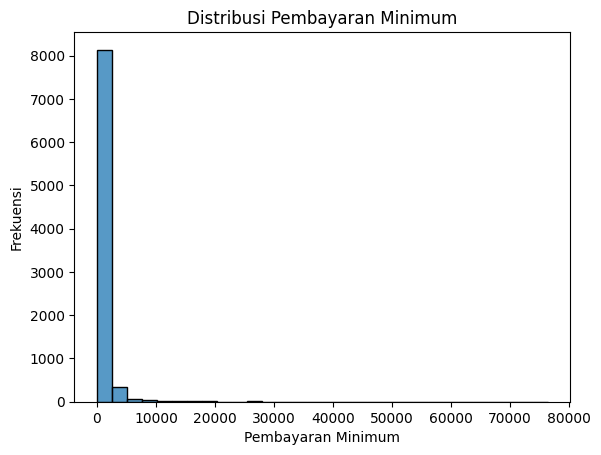

In [ ]:
sns.histplot(data=df, x='MINIMUM_PAYMENTS', bins=30)  # Adjust 'bins' as needed
plt.title('Distribusi Pembayaran Minimum')
plt.xlabel('Pembayaran Minimum')
plt.ylabel('Frekuensi')

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


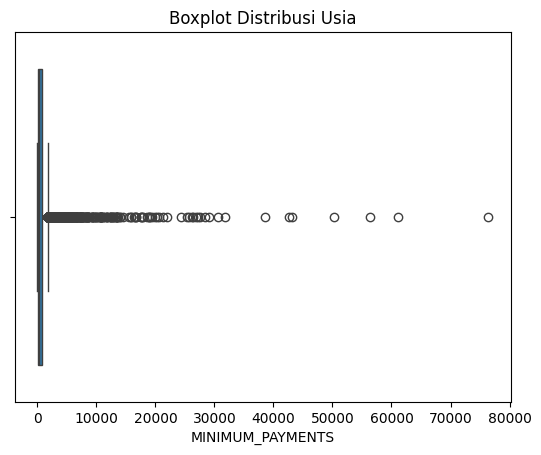

In [ ]:
sns.boxplot(x='MINIMUM_PAYMENTS', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()

In [ ]:
def drop_outliers(df, column, whiskers=1.5):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - whiskers * IQR
  upper_bound = Q3 + whiskers * IQR

  # Drop outliers
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  return df

def cap_outliers(df, column, whiskers=1.5):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - whiskers * IQR
  upper_bound = Q3 + whiskers * IQR

  # Cap outliers
  df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

  return df

In [ ]:
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  return outliers

def n_detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  num_outliers = len(outliers)

  return num_outliers

In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(exclude=['int64', 'float64']).columns

# Untuk semua kolom numerik
for col in numeric_features:
  outliers = n_detect_outliers(df, col)
  print(f"Outliers pada kolom '{col}':")
  print(outliers)

Outliers pada kolom 'BALANCE':
695
Outliers pada kolom 'BALANCE_FREQUENCY':
1493
Outliers pada kolom 'PURCHASES':
808
Outliers pada kolom 'ONEOFF_PURCHASES':
1013
Outliers pada kolom 'INSTALLMENTS_PURCHASES':
867
Outliers pada kolom 'CASH_ADVANCE':
1030
Outliers pada kolom 'PURCHASES_FREQUENCY':
0
Outliers pada kolom 'ONEOFF_PURCHASES_FREQUENCY':
782
Outliers pada kolom 'PURCHASES_INSTALLMENTS_FREQUENCY':
0
Outliers pada kolom 'CASH_ADVANCE_FREQUENCY':
525
Outliers pada kolom 'CASH_ADVANCE_TRX':
804
Outliers pada kolom 'PURCHASES_TRX':
766
Outliers pada kolom 'CREDIT_LIMIT':
248
Outliers pada kolom 'PAYMENTS':
808
Outliers pada kolom 'MINIMUM_PAYMENTS':
909
Outliers pada kolom 'PRC_FULL_PAYMENT':
1474
Outliers pada kolom 'TENURE':
1366


In [ ]:
# Mostly ada ouliernya tapi tidak bisa dihapus (log pr cap)
# df[numeric_features] = df[numeric_features].apply(np.log1p)
for feature in numeric_features:
  df = cap_outliers(df, feature)

In [ ]:
df_clean = df.copy()
df = df.drop('CUST_ID', axis=1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [ ]:
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Normalizing the Data
normalized_df = normalize(scaled_df)

normalized_df = pd.DataFrame(normalized_df)

# PCA
pca = PCA(n_components = 2)
X_principal_c = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal_c)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,-0.457946,-0.720214
1,-0.451348,0.589129


In [ ]:
X_principal_c

array([[-0.45794618, -0.72021402],
       [-0.45134792,  0.58912853],
       [ 0.33478899,  0.18745332],
       ...,
       [ 0.11770954, -0.78130802],
       [-0.5148808 , -0.58107431],
       [ 0.15168788, -0.06169809]])

In [ ]:
X_principal

,P1,P2
0,-0.457946,-0.720214
1,-0.451348,0.589129
2,0.334789,0.187453
3,-0.118027,-0.068909
4,-0.545335,-0.499016
...,...,...
8945,0.329419,-0.588021
8946,0.211362,-0.552820
8947,0.117710,-0.781308
8948,-0.514881,-0.581074


In [ ]:
'''
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o',linestyle="--")
plt.grid()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
'''

'\nwcss = []\nfor i in range(1, 11):\n    kmeans = KMeans(n_clusters=i, random_state=42)\n    kmeans.fit(df)\n    wcss.append(kmeans.inertia_)\n\nplt.plot(range(1, 11), wcss, marker=\'o\',linestyle="--")\nplt.grid()\nplt.title(\'Elbow Method\')\nplt.xlabel(\'Number of clusters\')\nplt.ylabel(\'WCSS\')\nplt.show()\n'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

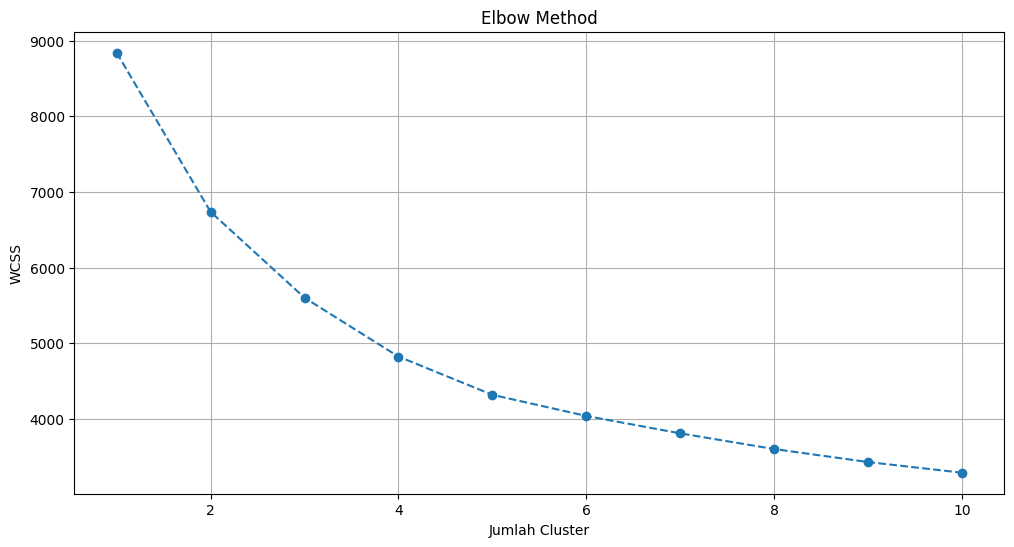

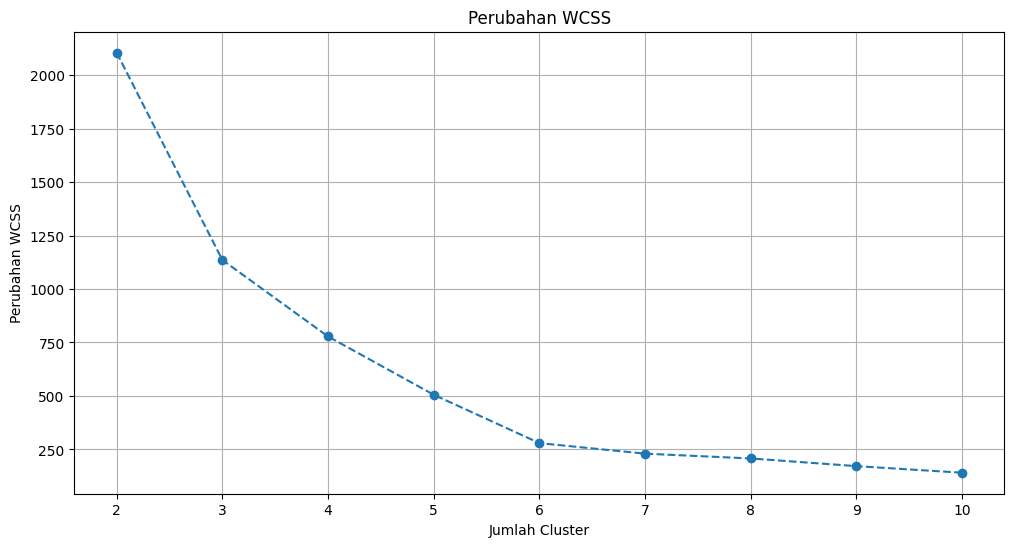

In [ ]:
wcss = []
delta_wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

# Menghitung perubahan WCSS
for i in range(1, len(wcss)):
    delta_wcss.append(wcss[i-1] - wcss[i])

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', label='WCSS')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid(True)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), delta_wcss, marker='o', linestyle='--', label='Perubahan WCSS')
plt.title('Perubahan WCSS')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Perubahan WCSS')
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

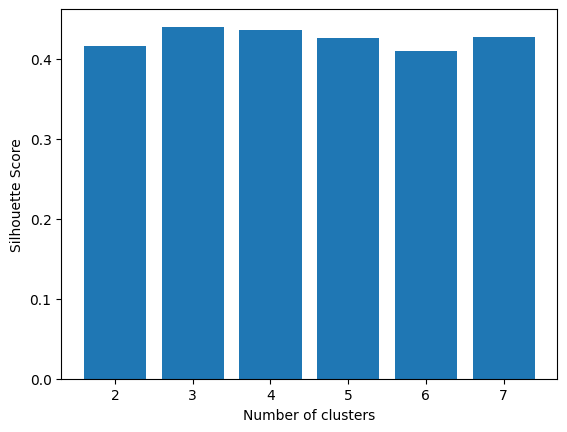

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal)))
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

In [ ]:
sh_score = {'Jumlah Cluster': k, 'Silhouette Score': silhouette_scores}
df_sh_score = pd.DataFrame(sh_score)
df_sh_score

,Jumlah Cluster,Silhouette Score
0,2,0.416041
1,3,0.439924
2,4,0.435280
3,5,0.425972
4,6,0.409112
5,7,0.427138


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

kmeans.fit(normalized_df)

labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
labels

array([1, 0, 2, ..., 1, 1, 2], dtype=int32)

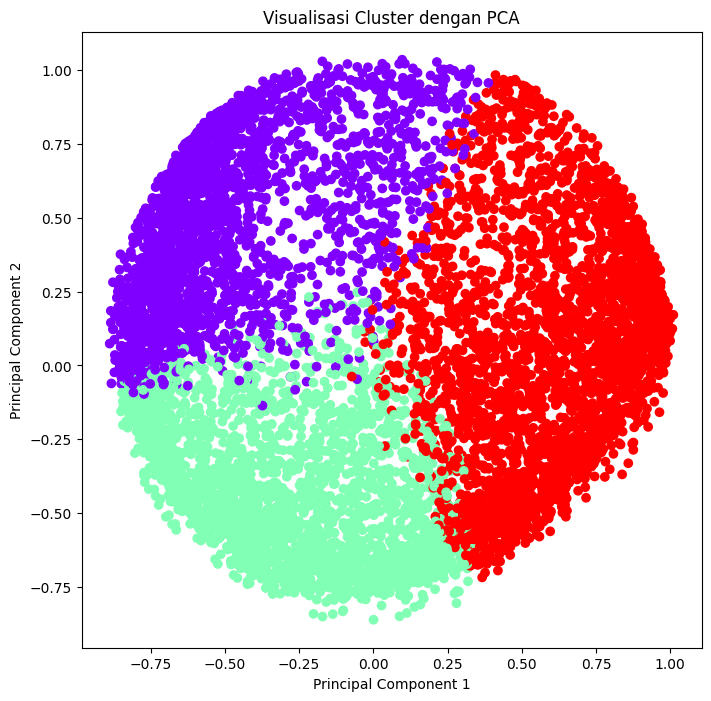

In [ ]:
# Visualization 3
plt.figure(figsize=(8, 8))
plt.scatter(X_principal_c[:, 0], X_principal_c[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Cluster dengan PCA')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

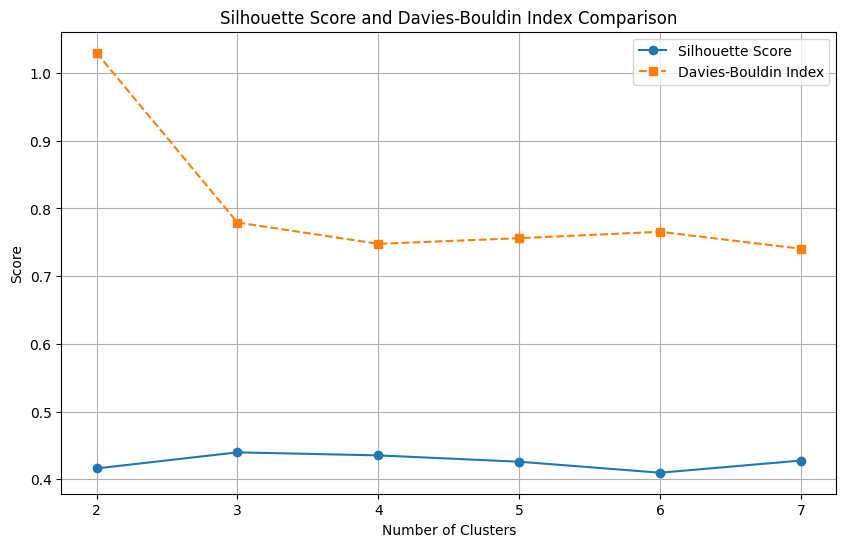

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_scores = []
davies_bouldin_scores = []

for n_cluster in range(2, 8):
    # Create and fit KMeans model for each number of clusters
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)  # Set random_state for reproducibility
    kmeans.fit(X_principal)

    # Calculate silhouette score and Davies-Bouldin Index
    silhouette_scores.append(silhouette_score(X_principal, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_principal, kmeans.labels_))

# Create a DataFrame (optional) for easier visualization and analysis
cluster_evaluation = pd.DataFrame({'Number of Clusters': range(2, 8),
                                  'Silhouette Score': silhouette_scores,
                                  'Davies-Bouldin Index': davies_bouldin_scores})

# Plot the results
plt.figure(figsize=(10, 6))

# Silhouette Score (solid line)
plt.plot(cluster_evaluation['Number of Clusters'], cluster_evaluation['Silhouette Score'], marker='o', label='Silhouette Score', linestyle='-')

# Davies-Bouldin Index (dashed line)
plt.plot(cluster_evaluation['Number of Clusters'], cluster_evaluation['Davies-Bouldin Index'], marker='s', label='Davies-Bouldin Index', linestyle='--')

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Score and Davies-Bouldin Index Comparison')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
cluster_evaluation

,Number of Clusters,Silhouette Score,Davies-Bouldin Index
0,2,0.416041,1.029893
1,3,0.439791,0.779185
2,4,0.435301,0.747691
3,5,0.425972,0.756033
4,6,0.409709,0.765508
5,7,0.427685,0.740393


In [ ]:
n_clusters = 4

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_principal)
y_kmeans = kmeans.fit_predict(X_principal)

# Calculate the silhouette score
silhouette_score_k3 = silhouette_score(X_principal, kmeans.labels_)
davies_bouldin_index_k3 = davies_bouldin_score(X_principal, kmeans.labels_)

# Print the result
print("silhouette_score for k=3:", silhouette_score_k3)
print("Davies-Bouldin Index for k=3:", davies_bouldin_index_k3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


silhouette_score for k=3: 0.43530108252304367
Davies-Bouldin Index for k=3: 0.7476910917617777


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(X_principal)

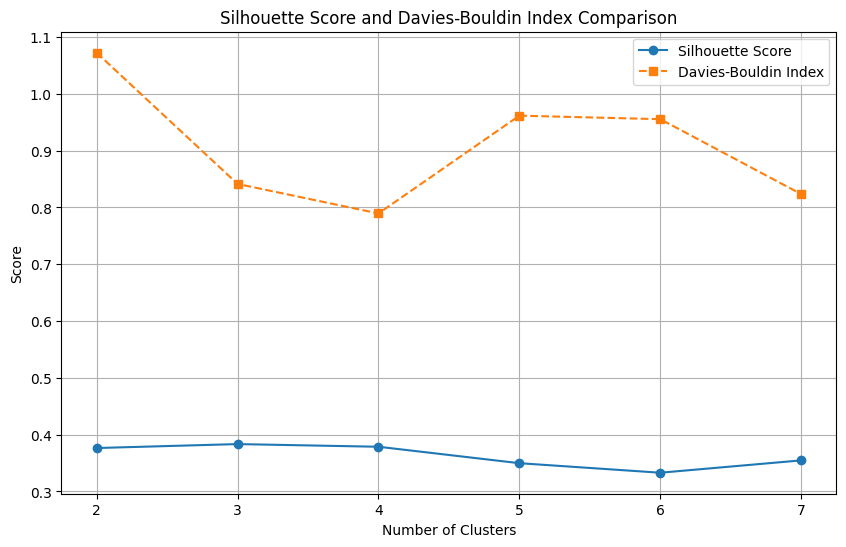

In [ ]:
silhouette_scores = []
davies_bouldin_scores = []

for n_clusters in range(2, 8):
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    y_agg_cluster = agg_cluster.fit_predict(X_principal)

    silhouette_score_val = silhouette_score(X_principal, y_agg_cluster)
    davies_bouldin_score_val = davies_bouldin_score(X_principal, y_agg_cluster)

    silhouette_scores.append(silhouette_score_val)
    davies_bouldin_scores.append(davies_bouldin_score_val)

# Create a DataFrame for visualization
cluster_evaluation = pd.DataFrame({'Number of Clusters': range(2, 8),
                                   'Silhouette Score': silhouette_scores,
                                   'Davies-Bouldin Index': davies_bouldin_scores})

# Plot the results
plt.figure(figsize=(10, 6))

# Silhouette Score (solid line)
plt.plot(cluster_evaluation['Number of Clusters'], cluster_evaluation['Silhouette Score'], marker='o', label='Silhouette Score', linestyle='-')

# Davies-Bouldin Index (dashed line)
plt.plot(cluster_evaluation['Number of Clusters'], cluster_evaluation['Davies-Bouldin Index'], marker='s', label='Davies-Bouldin Index', linestyle='--')

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Score and Davies-Bouldin Index Comparison')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
cluster_evaluation

,Number of Clusters,Silhouette Score,Davies-Bouldin Index
0,2,0.376422,1.072362
1,3,0.383365,0.841357
2,4,0.378678,0.789393
3,5,0.349730,0.961565
4,6,0.332948,0.955390
5,7,0.354676,0.823488


Kmeans memberikan perfromance matriks lebih baik dengan score


*   silhouette_score for k=3: 0.43530108412607715
*   Davies-Bouldin Index for k=3: 0.7476911019098365



In [ ]:
# df['Kmeans'] = y_agg_cluster
# df['Allgro'] = labels

# Lets find the insight

In [ ]:
n_clusters = 3

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_principal)
y_kmeans = kmeans.fit_predict(X_principal)

# Calculate the silhouette score
silhouette_score_k3 = silhouette_score(X_principal, kmeans.labels_)
davies_bouldin_index_k3 = davies_bouldin_score(X_principal, kmeans.labels_)

# Print the result
print("silhouette_score for k=3:", silhouette_score_k3)
print("Davies-Bouldin Index for k=3:", davies_bouldin_index_k3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


silhouette_score for k=3: 0.43979124257230634
Davies-Bouldin Index for k=3: 0.7791853724127559


In [ ]:
y_kmeans.shape

(8950,)

In [ ]:
# df_clean = df_clean.drop('CUST_ID', axis=1)
df_clean = df_clean.copy()

In [ ]:
df_cluster = pd.concat([df_clean, pd.DataFrame({'Cluster': y_kmeans})], axis=1)
df_cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,C10002,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,C10003,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0
3,C10004,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,2
4,C10005,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2


In [ ]:
df_cluster_map = df_cluster.copy()

In [ ]:
mapping = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}

df_cluster['Cluster'] = df_cluster['Cluster'].map(mapping)

In [ ]:
df_cluster['Cluster'].unique()

array(['Cluster 2', 'Cluster 1', 'Cluster 0'], dtype=object)

<ipython-input-80-9d004007f49c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_cluster, palette=colors)


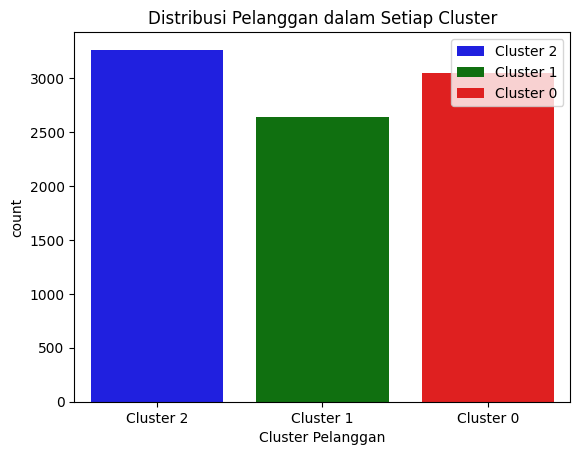

In [ ]:
# Mendefinisikan warna secara manual
colors = ['blue', 'green', 'red']

# Membuat countplot dengan legenda
sns.countplot(x='Cluster', data=df_cluster, palette=colors)
plt.xlabel('Cluster Pelanggan')
plt.title('Distribusi Pelanggan dalam Setiap Cluster')

# Menambahkan legenda dengan label yang sesuai
plt.legend(['Cluster 2', 'Cluster 1', 'Cluster 0'], loc='upper right')
plt.show()

In [ ]:
df_cluster_map = df_cluster_map.drop('CUST_ID', axis=1)

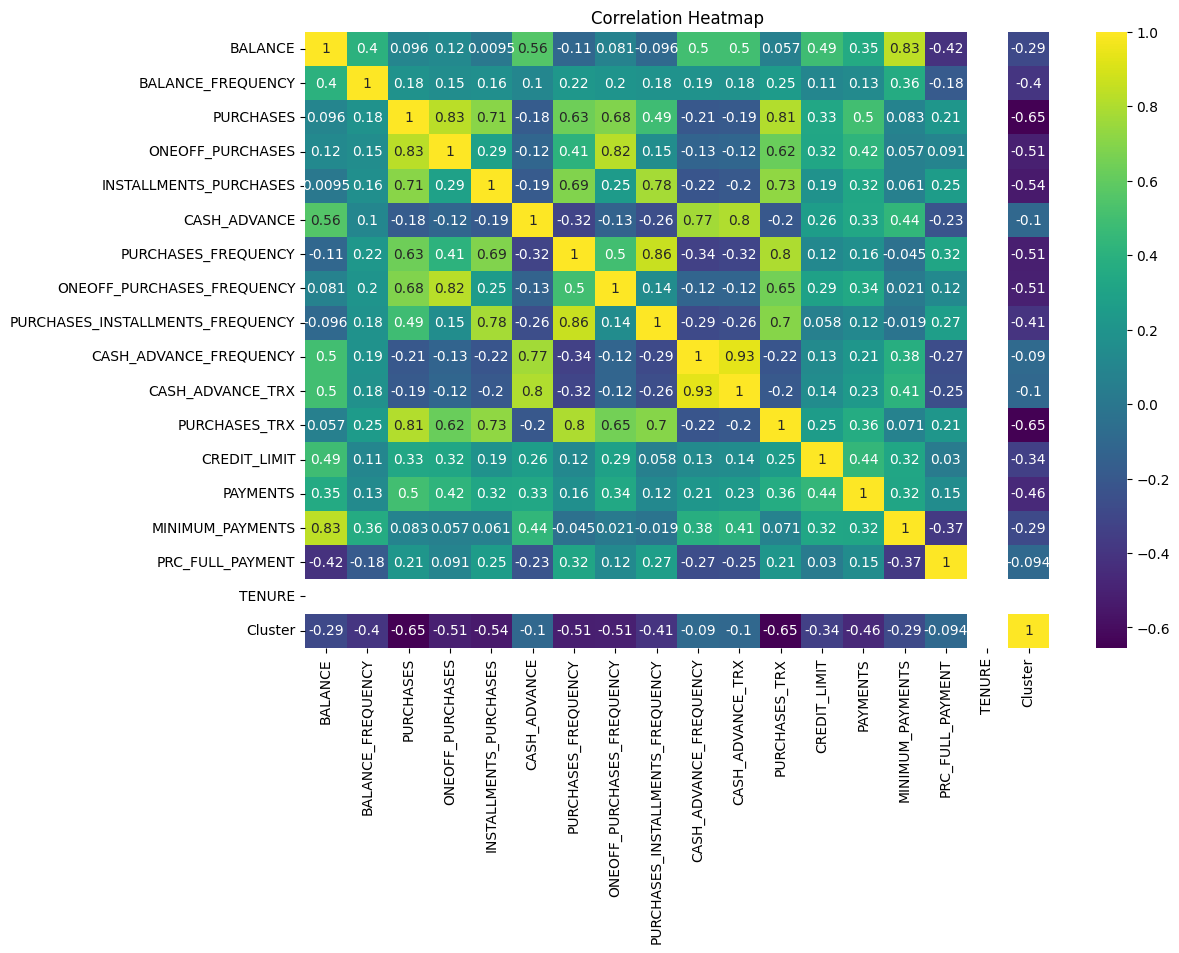

In [ ]:
correlation_matrix = df_cluster_map.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Analyze clusters
df_cluster_map.groupby('Cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
Cluster                                                             
0        3046.0  1433.299172  1515.378867   0.000000   228.046191   
1        2641.0  2567.957722  1548.244843  15.523256  1247.423771   
2        3263.0   397.563496   539.889459   0.000000    22.062577   

                                               BALANCE_FREQUENCY            \
                 50%          75%          max             count      mean   
Cluster                                                                      
0         870.832834  2116.174045  4942.927215            3046.0  0.972783   
1        2261.132204  4028.315428  4942.927215            2641.0  0.963334   
2          94.024070   680.733923  3143.231320            3263.0  0.867435   

         ... PRC_FULL_PAYMENT            TENURE                               \
         ...              75%       max   count  mean  std   min   25%   50%   
Cluster  ...                                                                   
0        ...         0.357143  0.357143  3046.0  12.0  0.0  12.0  12.0  12.0   
1        ...         0.000000  0.357143  2641.0  12.0  0.0  12.0  12.0  12.0   
2        ...         0.200000  0.357143  3263.0  12.0  0.0  12.0  12.0  12.0   

                     
          75%   max  
Cluster              
0        12.0  12.0  
1        12.0  12.0  
2        12.0  12.0  

[3 rows x 136 columns]

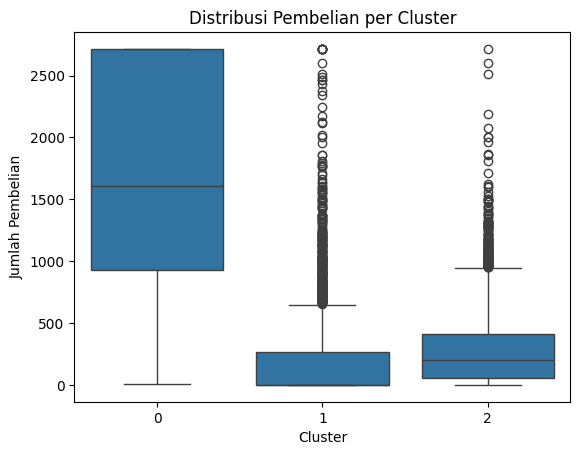

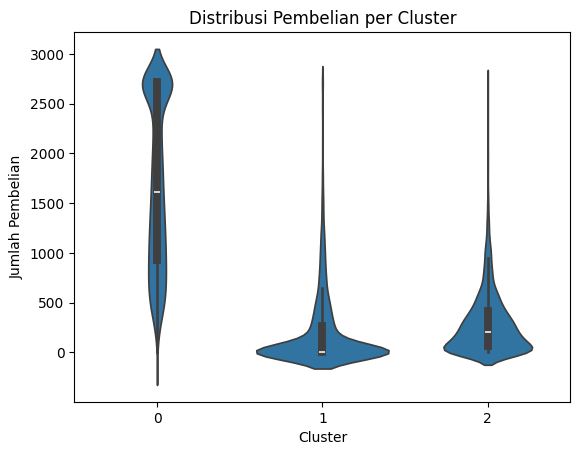

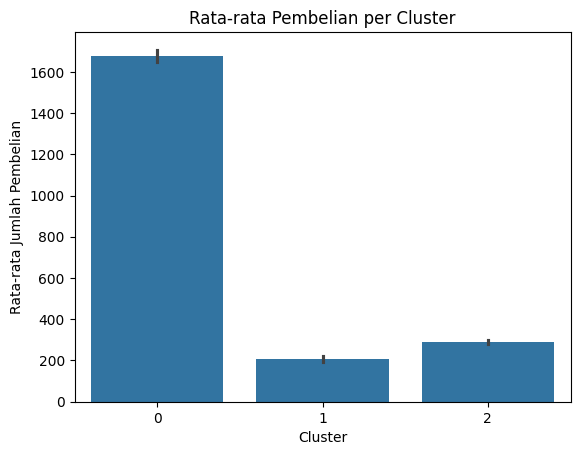

In [ ]:
# 1. Spending Behavior

# Box plot
sns.boxplot(x='Cluster', y='PURCHASES', data=df_cluster_map)
plt.title('Distribusi Pembelian per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pembelian')
plt.show()

# Violin plot
sns.violinplot(x='Cluster', y='PURCHASES', data=df_cluster_map)
plt.title('Distribusi Pembelian per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pembelian')
plt.show()

# Bar plot (menggunakan mean)
sns.barplot(x='Cluster', y='PURCHASES', data=df_cluster_map, estimator=np.mean)
plt.title('Rata-rata Pembelian per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.show()

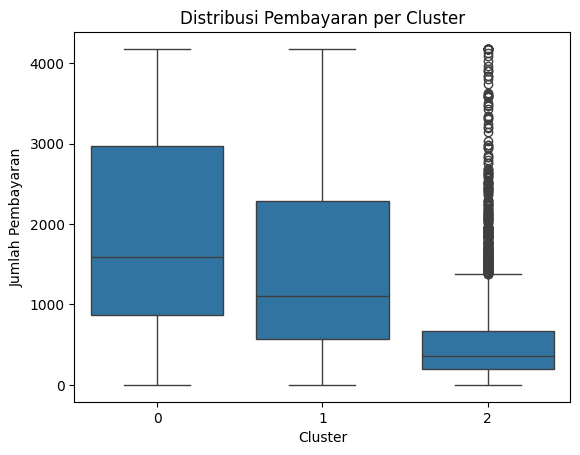

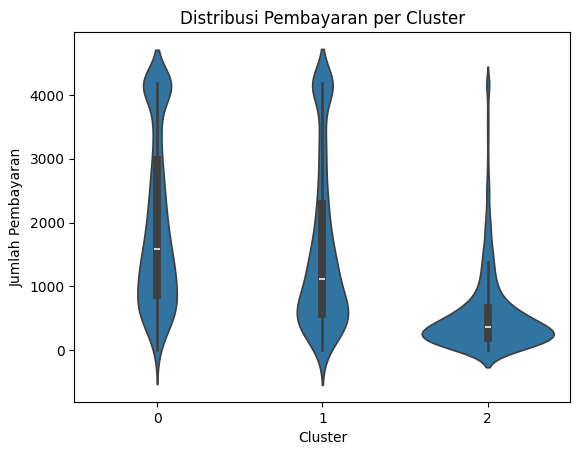

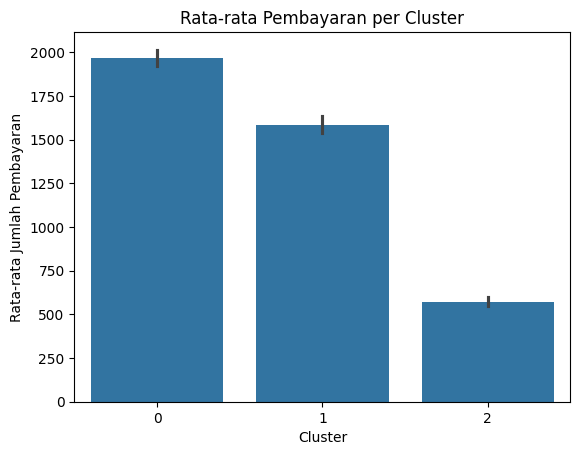

In [ ]:
# 2. Payment Behavior

# Box plot
sns.boxplot(D, data=df_cluster_map)
plt.title('Distribusi Pembayaran per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pembayaran')
plt.show()

# Violin plot
sns.violinplot(x='Cluster', y='PAYMENTS', data=df_cluster_map)
plt.title('Distribusi Pembayaran per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pembayaran')
plt.show()

# Bar plot (menggunakan mean)
sns.barplot(x='Cluster', y='PAYMENTS', data=df_cluster_map, estimator=np.mean)
plt.title('Rata-rata Pembayaran per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Jumlah Pembayaran')
plt.show()

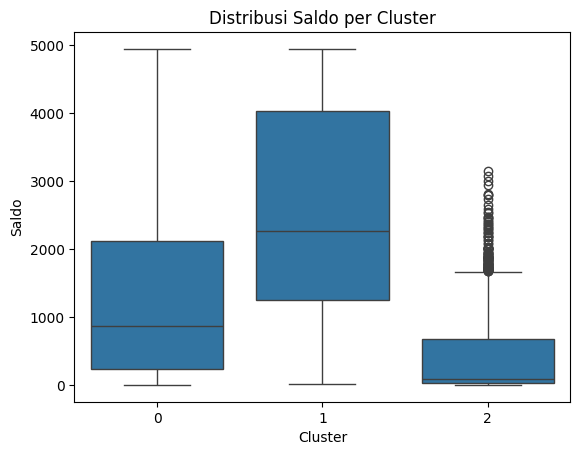

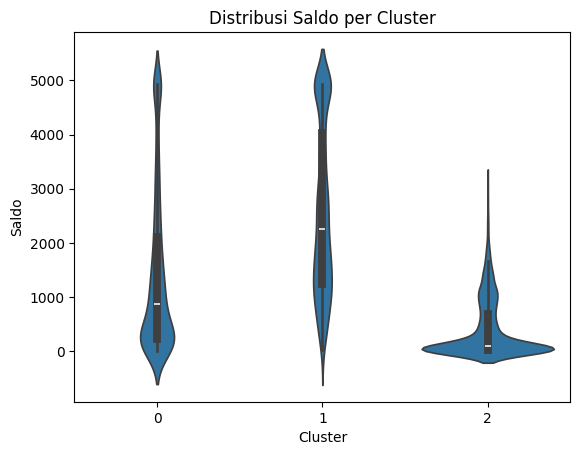

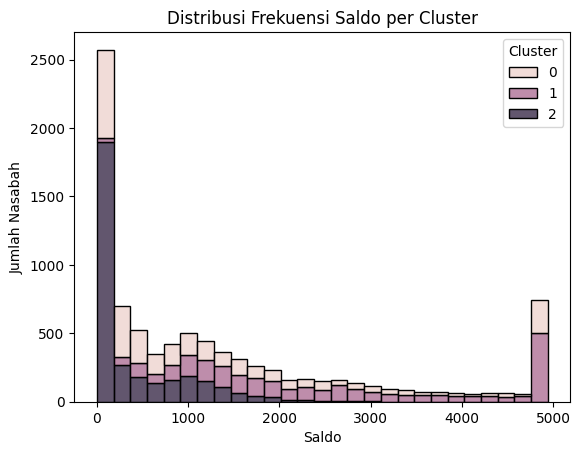

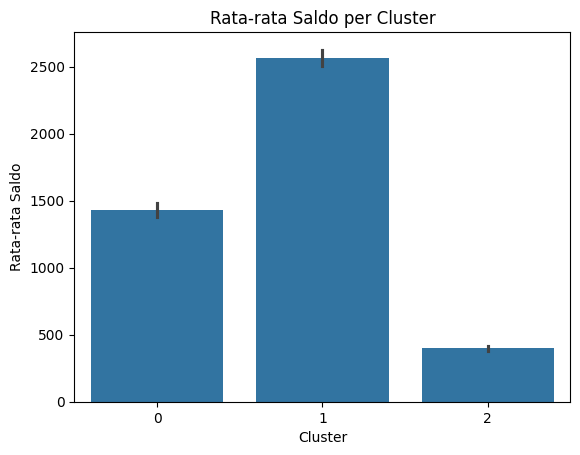

In [ ]:
# 3. Credit Utilization

# Box plot
sns.boxplot(x='Cluster', y='BALANCE', data=df_cluster_map)
plt.title('Distribusi Saldo per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Saldo')
plt.show()

# Violin plot
sns.violinplot(x='Cluster', y='BALANCE', data=df_cluster_map)
plt.title('Distribusi Saldo per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Saldo')
plt.show()

# Histogram
sns.histplot(data=df_cluster_map, x='BALANCE', hue='Cluster', multiple="stack")
plt.title('Distribusi Frekuensi Saldo per Cluster')
plt.xlabel('Saldo')
plt.ylabel('Jumlah Nasabah')
plt.show()

# Barplot
sns.barplot(x='Cluster', y='BALANCE', data=df_cluster_map, estimator=np.mean)
plt.title('Rata-rata Saldo per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Saldo')
plt.show()

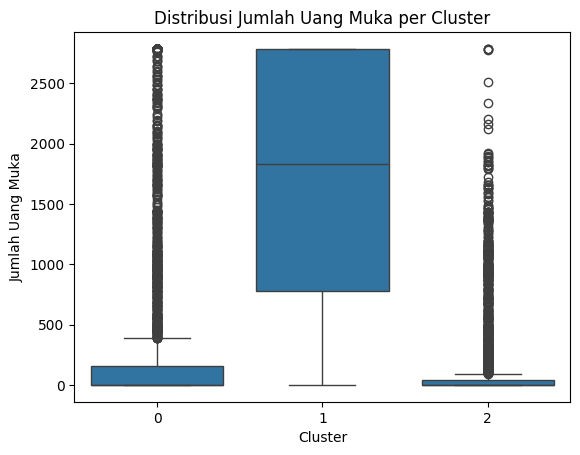

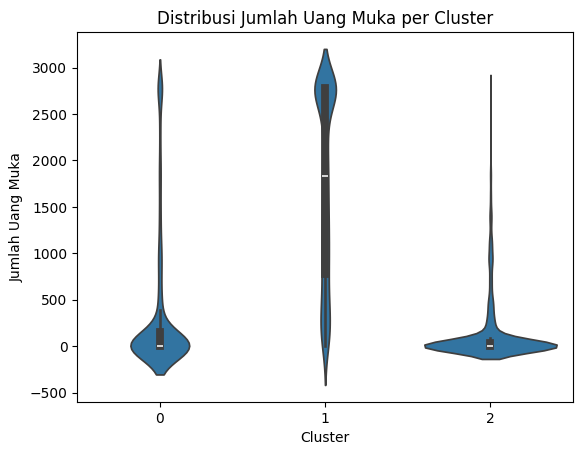

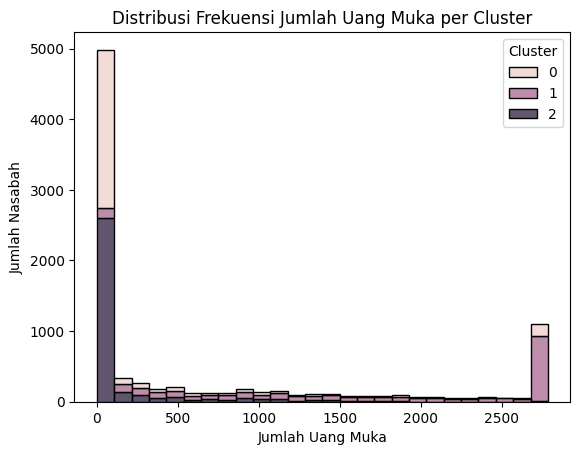

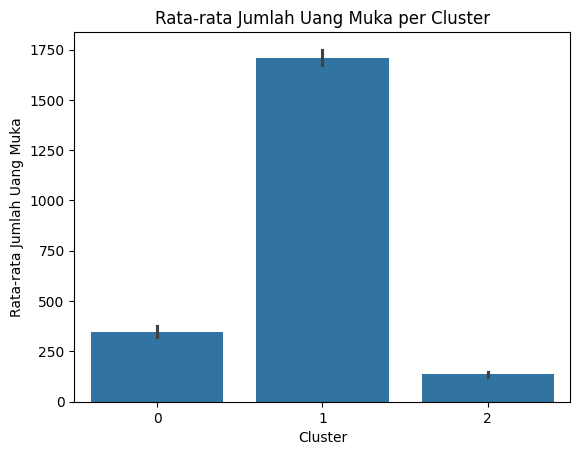

In [ ]:
# 4. Cash Advance Usage

# Box plot
sns.boxplot(x='Cluster', y='CASH_ADVANCE', data=df_cluster_map)
plt.title('Distribusi Jumlah Uang Muka per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Uang Muka')
plt.show()

# Violin plot
sns.violinplot(x='Cluster', y='CASH_ADVANCE', data=df_cluster_map)
plt.title('Distribusi Jumlah Uang Muka per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Uang Muka')
plt.show()

# Histogram
sns.histplot(data=df_cluster_map, x='CASH_ADVANCE', hue='Cluster', multiple="stack")
plt.title('Distribusi Frekuensi Jumlah Uang Muka per Cluster')
plt.xlabel('Jumlah Uang Muka')
plt.ylabel('Jumlah Nasabah')
plt.show()

# Bar plot (menggunakan mean)
sns.barplot(x='Cluster', y='CASH_ADVANCE', data=df_cluster_map, estimator=np.mean)
plt.title('Rata-rata Jumlah Uang Muka per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Jumlah Uang Muka')
plt.show()

In [ ]:
# PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES PURCHASES_FREQUENCY PURCHASES_TRX PAYMENTS

In [ ]:
'''
1. Spending Behavior:
PURCHASES: Total amount spent.
ONEOFF_PURCHASES: Large, one-time purchases.
INSTALLMENTS_PURCHASES: Installment-based spending.
PURCHASES_FREQUENCY: Purchase frequency.
ONEOFFPURCHASESFREQUENCY: Frequency of large, one-time purchases.
PURCHASESINSTALLMENTSFREQUENCY: Frequency of installment purchases.

2. Payment Behavior:
PAYMENTS: Total payments made.
MINIMUM_PAYMENTS: Minimum payments made.
PRCFULLPAYMENT: Percentage of full payments.

3. Credit Utilization:
BALANCE: Current balance.
BALANCE_FREQUENCY: Balance update frequency.
CREDIT_LIMIT: Credit limit.

4. Cash Advance Usage:
CASH_ADVANCE: Cash advanced.
CASHADVANCEFREQUENCY: Cash advance frequency.
CASHADVANCETRX: Cash advance transactions.
'''

In [ ]:
df_clean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,C10002,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,C10004,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0
4,C10005,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [ ]:
df_cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,Cluster 2
1,C10002,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,Cluster 1
2,C10003,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,Cluster 0
3,C10004,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,Cluster 2
4,C10005,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,Cluster 2


In [ ]:
df_cluster.to_excel('CC_clustering.xlsx')

In [ ]:
df_clean.to_csv('CC_clustering.csv')

# Streamlit

In [ ]:
!pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [108]:
!wget -q -O - ipv4.icanhazip.com

35.185.93.234


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.93.234:8501

your url is: https://slick-beers-melt.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

In [ ]:
'''
Cluster 0: Pembeli dan Pembayar Tinggi
•	Profil: Pelanggan premium dengan daya beli tinggi.
•	Perilaku: Belanja besar, pembayaran disiplin, penggunaan kredit seimbang.
•	Strategi: Fokus pada promosi eksklusif, upselling, dan mempertahankan loyalitas.
Cluster 1: Pemegang Saldo Tinggi dan Pengguna Cash Advance
•	Profil: Pelanggan dengan potensi risiko tinggi.
•	Perilaku: Penggunaan kredit tinggi, sering menggunakan cash advance.
•	Strategi: Tawarkan solusi manajemen utang, edukasi finansial, dan batasi penawaran kredit.
Cluster 2: Pembeli dan Pengguna Kredit Rendah
•	Profil: Pelanggan konservatif dengan pengeluaran rendah.
•	Perilaku: Belanja sedikit, penggunaan kredit rendah.
•	Strategi: Tawarkan produk hemat biaya, edukasi kredit, dan promosi yang menarik.
'''